### 在Windows上使用graph tool

In [35]:
import graph_tool.all as gt
import numpy as np

#### 创建有向图

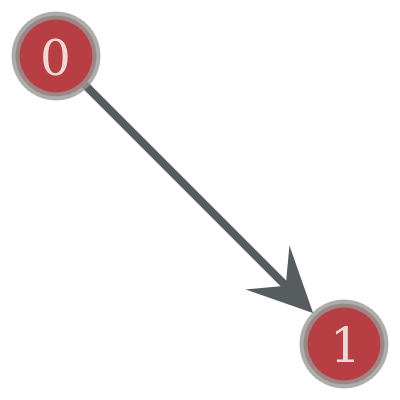

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f3e255f3bb0, at 0x7f3e255a14e0>

In [36]:
g = gt.Graph()
# 增加节点
v1 = g.add_vertex()
v2 = g.add_vertex()
e = g.add_edge(v1, v2)
gt.graph_draw(g, vertex_text=g.vertex_index, output_size=(200, 200))
# # 指定output可以将绘图结果以文件的形式保存
# gt.graph_draw(g, vertex_text=g.vertex_index, output_size=(200, 200),output="example_network.pdf")

#### 创建无向图

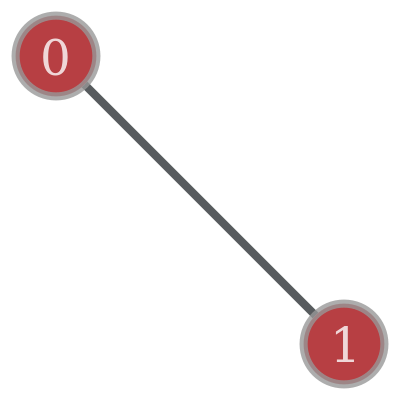

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f3e255f2b00, at 0x7f3e255e6290>

In [37]:
ug = gt.Graph(directed=False)
v1 = ug.add_vertex()
v2 = ug.add_vertex()
e = ug.add_edge(v1, v2)
gt.graph_draw(ug, vertex_text=ug.vertex_index, output_size=(200, 200))

#### 用内置图生成器生成一些经典网络图

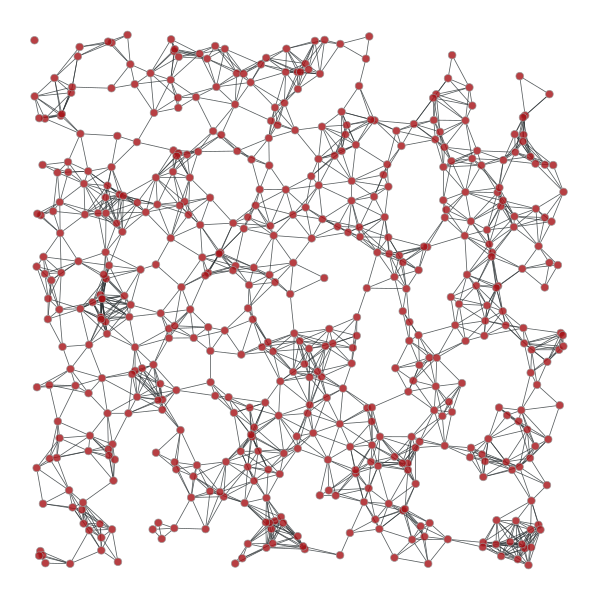

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f3e255f3070, at 0x7f3e255a1c30>

In [38]:
# 生成几何图
from numpy.random import random
points = random((500, 2)) * 4
g, pos = gt.geometric_graph(points, 0.3)
gt.graph_draw(g, pos=pos, output_size=(300, 300))

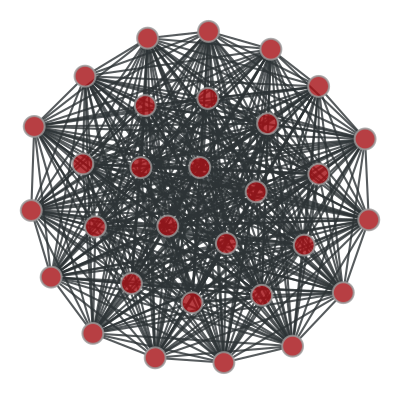

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f3e255f3be0, at 0x7f3e255e5ff0>

In [39]:
# 生成完全图
g = gt.complete_graph(30)
pos = gt.sfdp_layout(g, cooling_step=0.95, epsilon=1e-2)
gt.graph_draw(g, pos=pos, output_size=(200, 200))

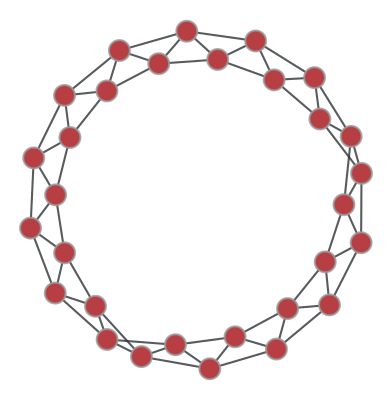

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f3e255f2a10, at 0x7f3e255f3f70>

In [40]:
# 生成环状图
g = gt.circular_graph(30, 2)
pos = gt.sfdp_layout(g, cooling_step=0.95)
gt.graph_draw(g, pos=pos, output_size=(200, 200))

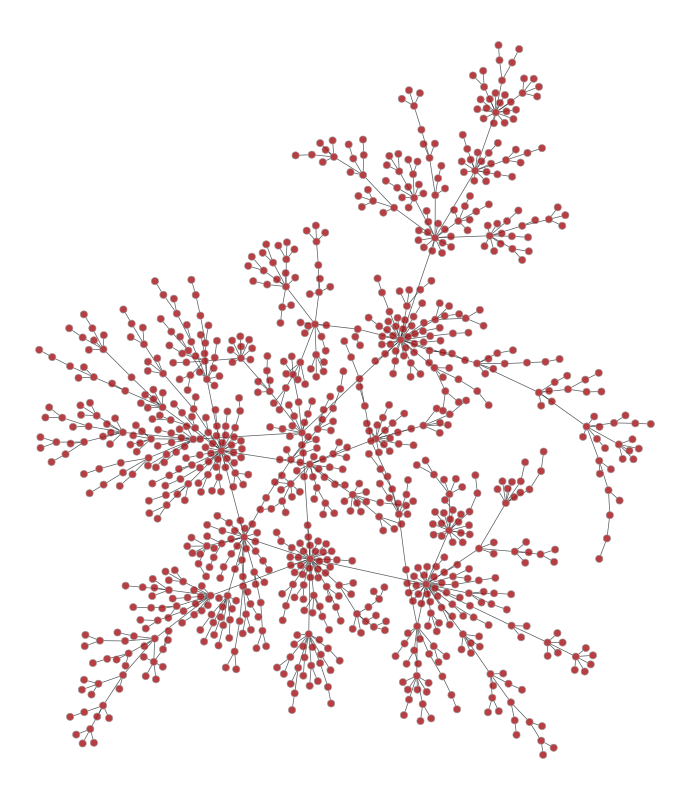

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f3e255f2f80, at 0x7f3e255f3af0>

In [41]:
# 生成BA无标度网络
g = gt.price_network(1000, m=1, c=0, gamma=1, directed=False)
pos = gt.sfdp_layout(g)
gt.graph_draw(g, pos=pos, output_size=(400, 400))

#### 加载graph tool自带的真实网络数据集：https://networks.skewed.de/

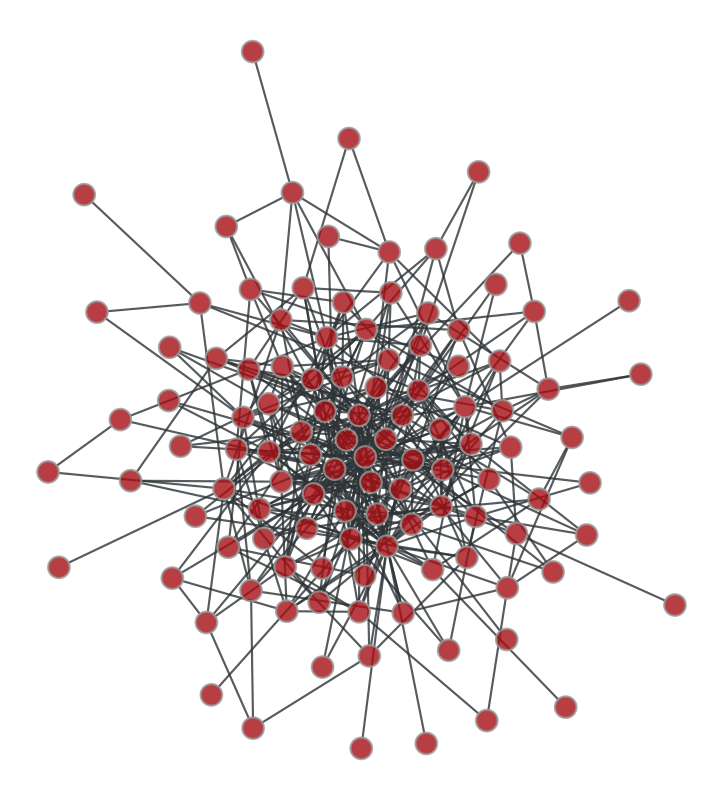

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f3e44576470, at 0x7f3e255e5f00>

In [42]:
g = gt.collection.ns["adjnoun"]
pos = gt.sfdp_layout(g)
gt.graph_draw(g, pos=pos, output_size=(400, 400))

#### 计算中心性指标

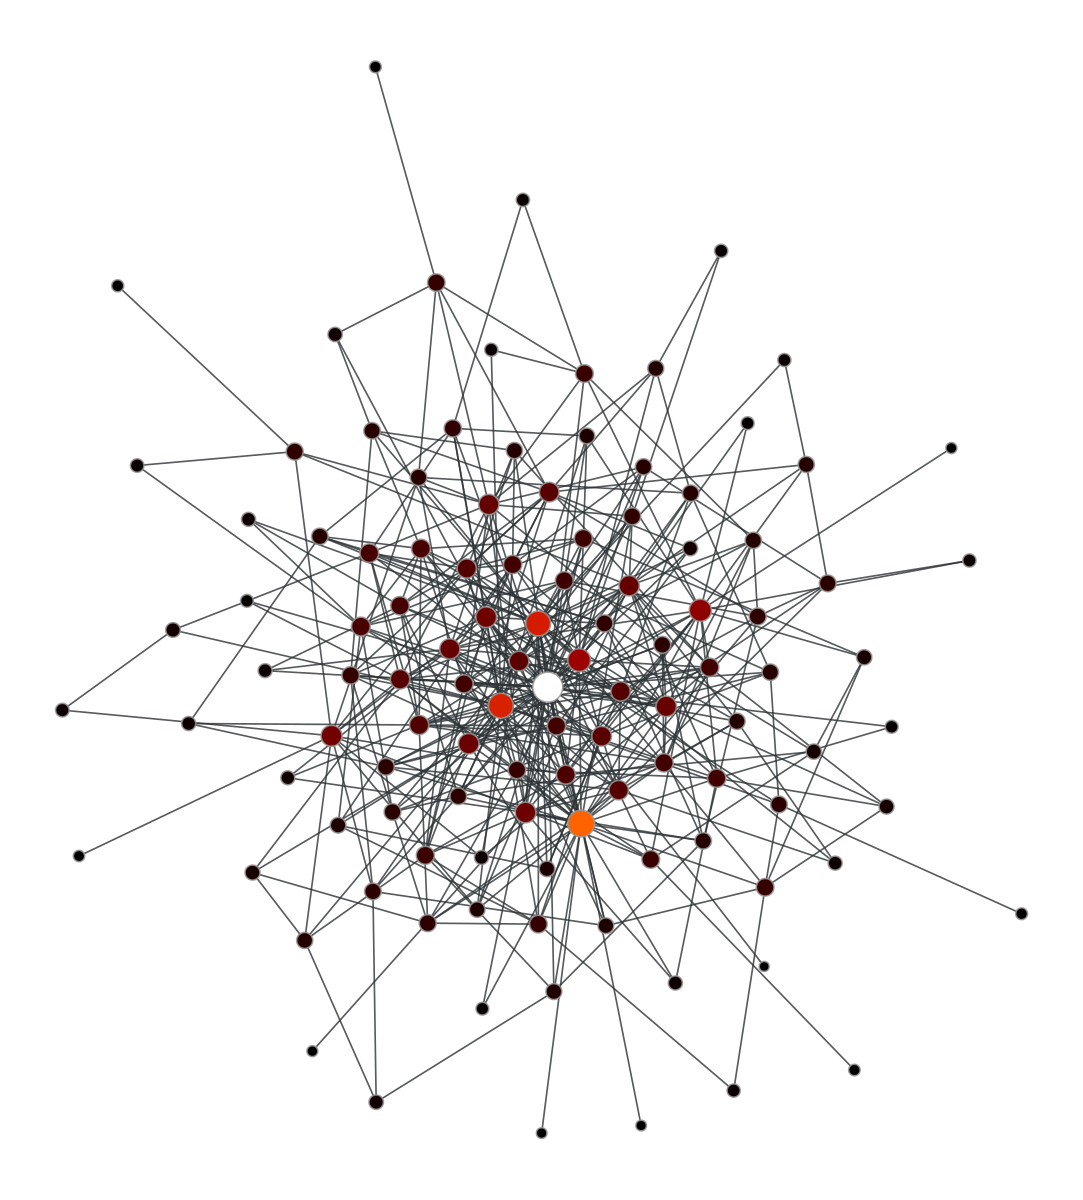

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f3e44576470, at 0x7f3e443c5f00>

In [51]:
import matplotlib
# pagerank中心性
pr = gt.pagerank(g)
# print(list(pr))
gt.graph_draw(g, pos=pos, vertex_fill_color=pr,
              vertex_size=gt.prop_to_size(pr, mi=5, ma=15),
              vorder=pr, vcmap=matplotlib.cm.gist_heat)

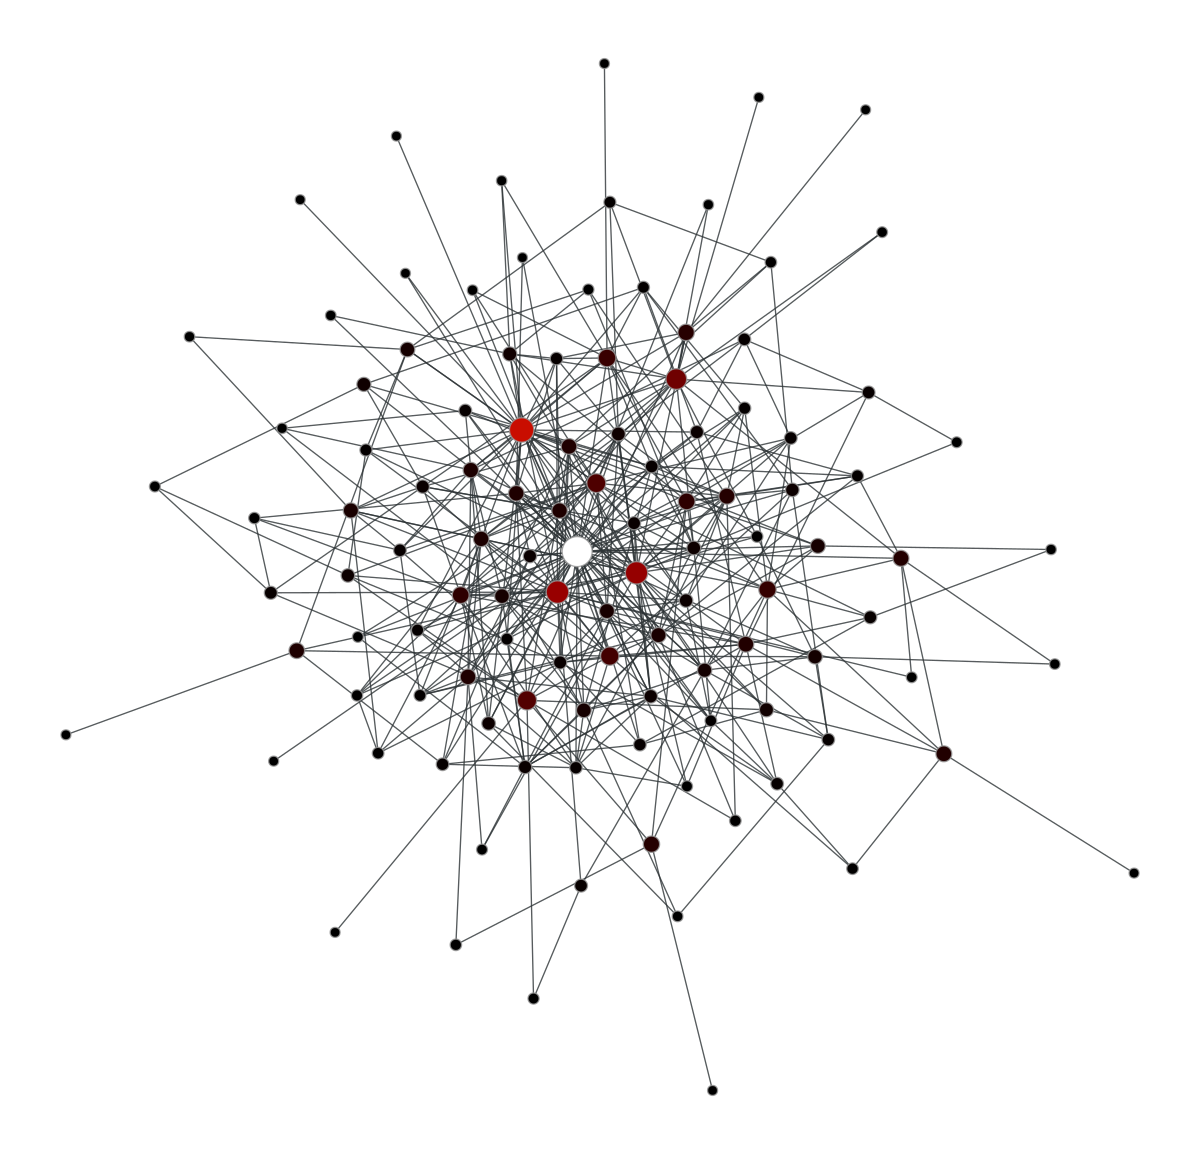

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f3e44576470, at 0x7f3e443e0790>

In [28]:
# 计算节点介数和边介数中心性
vp, ep = gt.betweenness(g)
gt.graph_draw(g, pos=pos, vertex_fill_color=vp,
              vertex_size=gt.prop_to_size(vp, mi=5, ma=15),
              vorder=vp, vcmap=matplotlib.cm.gist_heat)

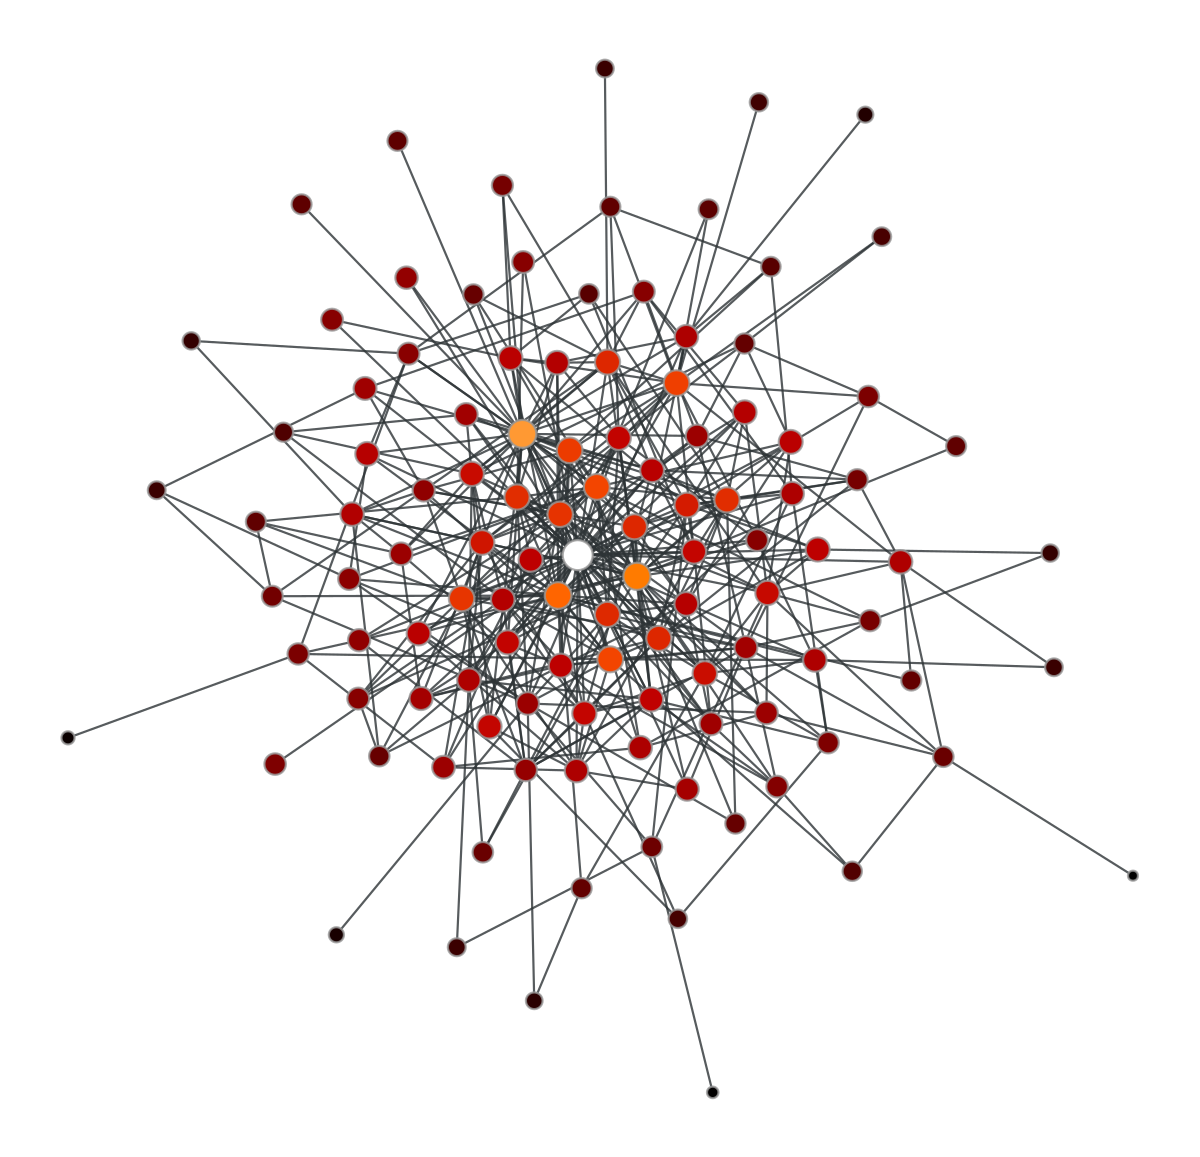

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f3e44576470, at 0x7f3e442fdd20>

In [29]:
# 计算接近度中心性
c = gt.closeness(g)
gt.graph_draw(g, pos=pos, vertex_fill_color=c,
              vertex_size=gt.prop_to_size(c, mi=5, ma=15),
              vorder=c, vcmap=matplotlib.cm.gist_heat)

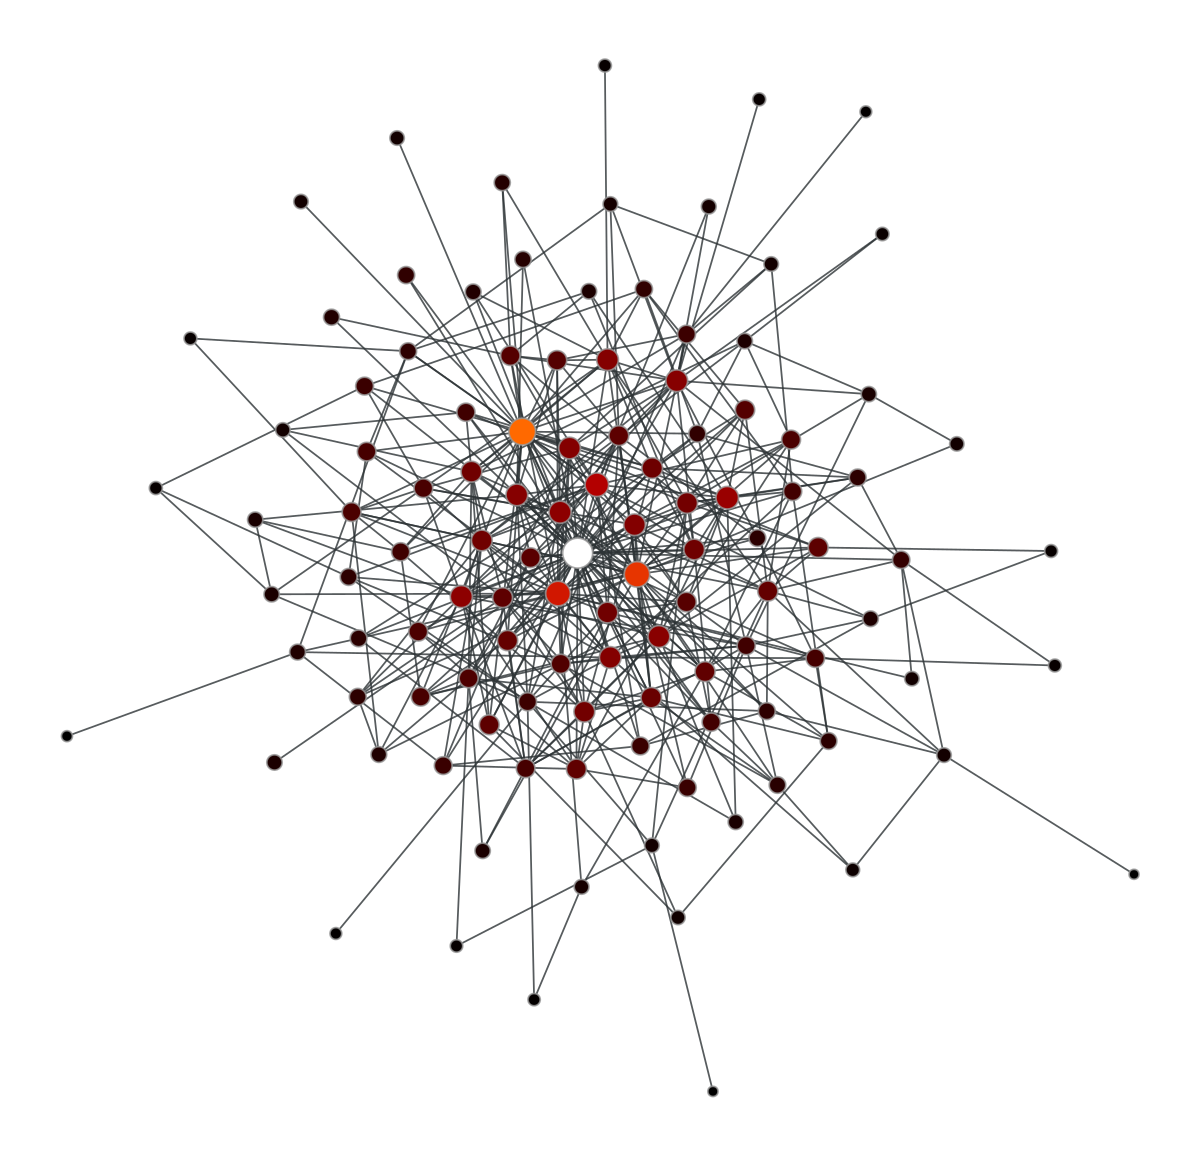

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f3e44576470, at 0x7f3e442e9900>

In [31]:
# 计算特征向量中心性
ee, x = gt.eigenvector(g)
gt.graph_draw(g, pos=pos, vertex_fill_color=x,
              vertex_size=gt.prop_to_size(x, mi=5, ma=15),
              vorder=x, vcmap=matplotlib.cm.gist_heat)

#### 可视化进阶：生成一个price网络并可视化

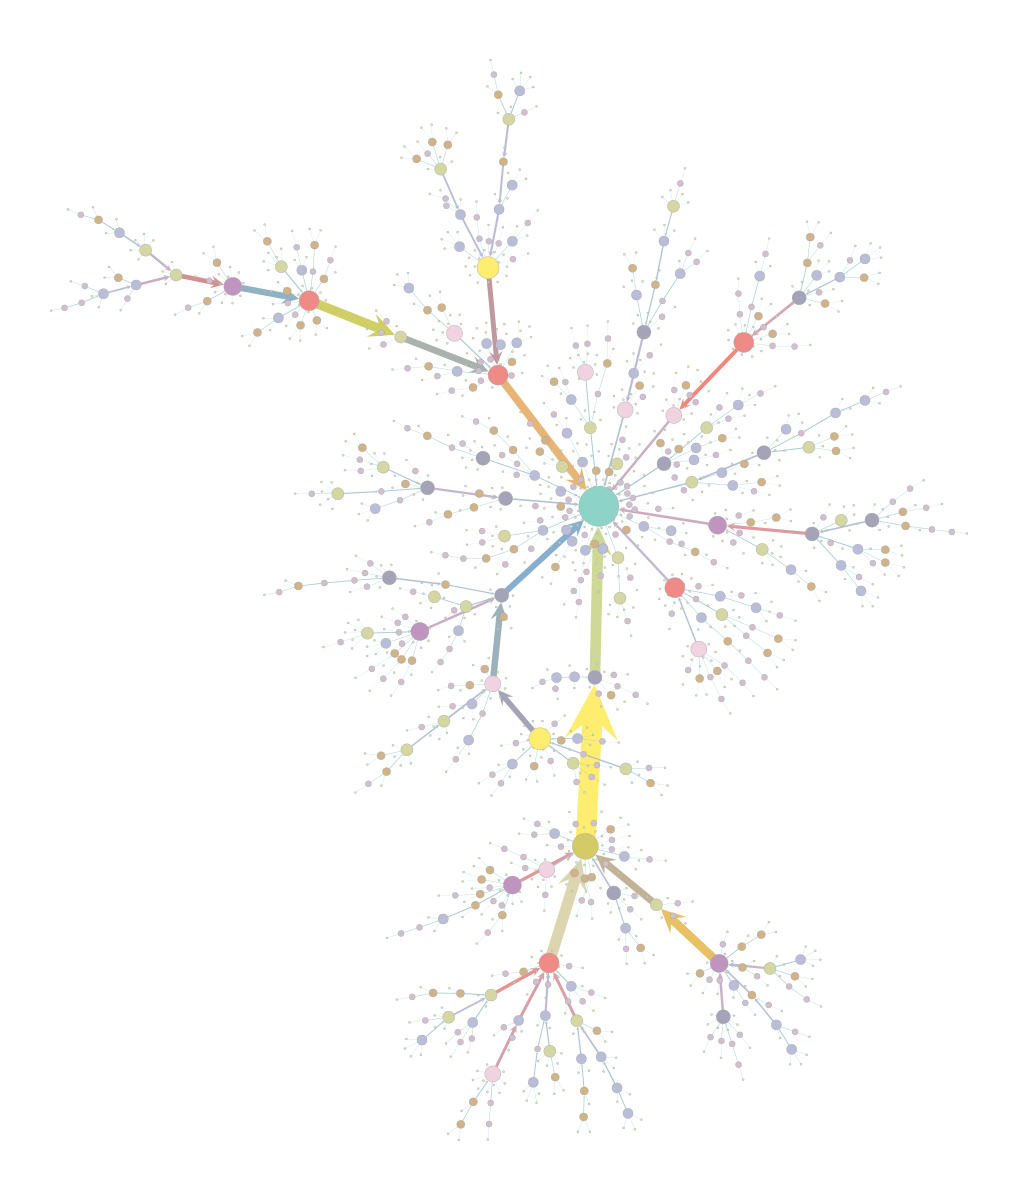

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f3e255f4220, at 0x7f3e255a0520>

In [32]:
g = gt.price_network(1500)
deg = g.degree_property_map("in")
deg.a = 4 * (np.sqrt(deg.a) * 0.5 + 0.4)
ebet = gt.betweenness(g)[1]
ebet.a /= ebet.a.max() / 10.
eorder = ebet.copy()
eorder.a *= -1
pos = gt.sfdp_layout(g)
control = g.new_edge_property("vector<double>")
for e in g.edges():
    d = np.sqrt(sum((pos[e.source()].a - pos[e.target()].a) ** 2)) / 5
    control[e] = [0.3, d, 0.7, d]
gt.graph_draw(g, pos=pos, vertex_size=deg, vertex_fill_color=deg, vorder=deg,
              edge_color=ebet, eorder=eorder, edge_pen_width=ebet,
              edge_control_points=control)